In [8]:
import pandas as pd
acc = pd.read_csv('시간대별+교통사고+현황_20240529171223.csv')
acc

,자치구별(1),자치구별(2),항목,2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,2023.8,2023.9,2023.10,2023.11,2023.12
0,자치구별(1),자치구별(2),항목,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
1,자치구별(1),자치구별(2),항목,소계,00시-02시,02시-04시,04시-06시,06시-08시,08시-10시,10시-12시,12시-14시,14시-16시,16시-18시,18시-20시,20시-22시,22시-24시
2,합계,소계,발생건수,33811,1443,866,959,1719,3457,3519,3690,3836,4249,4510,3145,2418
3,합계,소계,사망자수,180,21,14,13,14,13,13,10,14,14,13,13,28
4,합계,소계,부상자수,45414,2058,1197,1298,2197,4531,4703,4998,5216,5652,6019,4196,3349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,합계,송파구,사망자수,10,-,-,1,-,-,1,2,1,-,1,-,4
76,합계,송파구,부상자수,3603,136,96,99,196,343,353,408,391,453,500,347,281
77,합계,강동구,발생건수,1185,48,20,23,68,106,140,125,171,155,154,110,65
78,합계,강동구,사망자수,4,2,1,-,-,-,1,-,-,-,-,-,-


In [10]:
acc2 = acc.query('항목 == "발생건수"')\
        .tail(-1)\
        .astype(int)\
        .sort_values(['2023'], ascending = False)
acc2

ValueError: invalid literal for int() with base 10: '합계'

In [ ]:
acc2['2023'] = acc2['2023'].astype(int)\
                .sort_values(['2023'], ascending = False)

In [ ]:
acc2['2023'].plot.bar(x = '자치구별(2)', rot = 0)

In [30]:
acc2 = acc.query('항목 == "발생건수"')\
        .iloc[2:,3].astype(int)
acc2

8      931
11     996
14     919
17     717
20    1674
23    1268
26    1256
29     972
32     530
35    1366
38    1039
41     916
44    1250
47    1221
50    1518
53    1359
56     876
59    1900
62    1242
65     980
68    2168
71    3926
74    2614
77    1185
Name: 2023, dtype: int32

In [27]:
acc

,자치구별(1),자치구별(2),항목,2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,2023.8,2023.9,2023.10,2023.11,2023.12
0,자치구별(1),자치구별(2),항목,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
1,자치구별(1),자치구별(2),항목,소계,00시-02시,02시-04시,04시-06시,06시-08시,08시-10시,10시-12시,12시-14시,14시-16시,16시-18시,18시-20시,20시-22시,22시-24시
2,합계,소계,발생건수,33811,1443,866,959,1719,3457,3519,3690,3836,4249,4510,3145,2418
3,합계,소계,사망자수,180,21,14,13,14,13,13,10,14,14,13,13,28
4,합계,소계,부상자수,45414,2058,1197,1298,2197,4531,4703,4998,5216,5652,6019,4196,3349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,합계,송파구,사망자수,10,-,-,1,-,-,1,2,1,-,1,-,4
76,합계,송파구,부상자수,3603,136,96,99,196,343,353,408,391,453,500,347,281
77,합계,강동구,발생건수,1185,48,20,23,68,106,140,125,171,155,154,110,65
78,합계,강동구,사망자수,4,2,1,-,-,-,1,-,-,-,-,-,-


In [83]:
acc_total = acc[['자치구별(2)','항목','2023']].query('항목=="발생건수"')\
            .iloc[1:]
acc_total = acc_total.sort_values(by='2023', ascending=False)
acc_2023 = acc_total['2023'].astype(int)
acc_last = pd.merge(acc_total, acc_2023, how = 'left')
acc_last

ValueError: You are trying to merge on object and int32 columns for key '2023'. If you wish to proceed you should use pd.concat

In [96]:
acc_total = acc[['자치구별(2)','항목','2023']].query('항목=="발생건수"')\
            .iloc[1:]
acc_total['2023'] = acc_total['2023'].astype(int)
acc_total = acc_total.sort_values(by='2023', ascending=False)
acc_total


,자치구별(2),항목,2023
71,강남구,발생건수,3926
74,송파구,발생건수,2614
68,서초구,발생건수,2168
59,영등포구,발생건수,1900
20,동대문구,발생건수,1674
50,강서구,발생건수,1518
35,노원구,발생건수,1366
53,구로구,발생건수,1359
23,중랑구,발생건수,1268
26,성북구,발생건수,1256


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '강남구'),
  Text(1, 0, '송파구'),
  Text(2, 0, '서초구'),
  Text(3, 0, '영등포구'),
  Text(4, 0, '동대문구'),
  Text(5, 0, '강서구'),
  Text(6, 0, '노원구'),
  Text(7, 0, '구로구'),
  Text(8, 0, '중랑구'),
  Text(9, 0, '성북구'),
  Text(10, 0, '마포구'),
  Text(11, 0, '동작구'),
  Text(12, 0, '양천구'),
  Text(13, 0, '강동구'),
  Text(14, 0, '은평구'),
  Text(15, 0, '용산구'),
  Text(16, 0, '종로구'),
  Text(17, 0, '관악구'),
  Text(18, 0, '강북구'),
  Text(19, 0, '중구'),
  Text(20, 0, '성동구'),
  Text(21, 0, '서대문구'),
  Text(22, 0, '금천구'),
  Text(23, 0, '광진구'),
  Text(24, 0, '도봉구')])

findfont: Font family 'Nanum Brush Script' not found.
findfont: Font family 'Nanum Brush Script' not found.
findfont: Font family 'Nanum Brush Script' not found.
findfont: Font family 'Nanum Brush Script' not found.
findfont: Font family 'Nanum Brush Script' not found.
findfont: Font family 'Nanum Brush Script' not found.
findfont: Font family 'Nanum Brush Script' not found.
findfont: Font family 'Nanum Brush Script' not found.
findfont: Font family 'Nanum Brush Script' not found.
findfont: Font family 'Nanum Brush Script' not found.
findfont: Font family 'Nanum Brush Script' not found.
C:\Users\PC\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  func(*args, **kwargs)
C:\Users\PC\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
C:\Users\PC\anaconda3\Lib\site-packages\IPython\core\events.py:82:

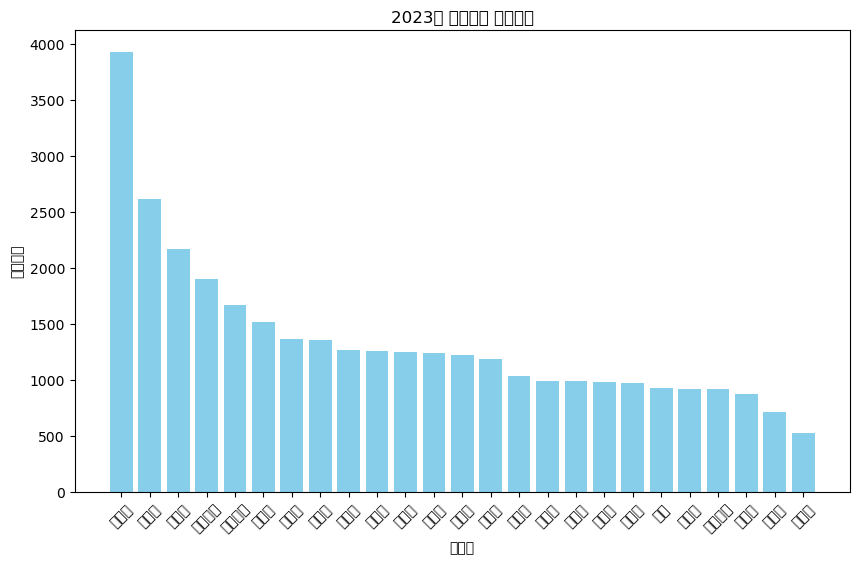

In [113]:

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 6))
plt.bar(acc_total['자치구별(2)'], acc_total['2023'], color='skyblue')

plt.title('2023년 자치구별 발생건수')
plt.xlabel('자치구')
plt.ylabel('발생건수')

# x축 레이블 회전 (필요시)
plt.xticks(rotation=45)

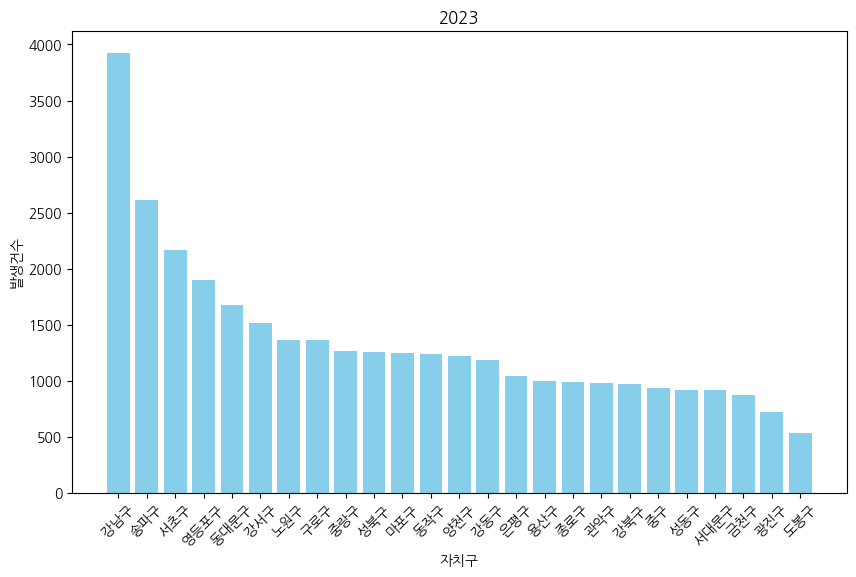

In [117]:
from matplotlib import font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothic.ttf' # 나눔고딕 폰트 이용
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(10, 6))
plt.bar(acc_total['자치구별(2)'], acc_total['2023'], color='skyblue')

plt.title('2023')
plt.xlabel('자치구')
plt.ylabel('발생건수')

plt.xticks(rotation=45)

plt.show()

'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
